# Census Project

### The goal this project is to identify the patterns and customs of the people.

## 1 - Importing libs.

In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

/home/dataanalysis/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


## 2 - Reading file and Exploration of Data

In [4]:
# Reading
df_census = pd.read_csv('/media/sf_FormacaoCientistaDeDados/Portfolio/Census/adult.csv',index_col=False)

In [5]:
# Shape
df_census.shape

(32561, 15)

In [6]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### As we see, the features are according to the data types.
#### The Dataset was downloaded from https://archive.ics.uci.edu/ml/datasets/Adult.


### Description of features.
#### Features not-self explanatory.

age: continuous. 
workclass:  
fnlwgt: represents final weight, which is the number of units in the target population that the responding unit represents. 
education: degree of education.
education-num: represents years of study. 
marital-status: 
occupation: 
relationship:  represents role in the family
race: 
sex:  
capital-gain:  are income from investment sources other than wage.
capital-loss:  are income from investment sources other than wage.
hours-per-week: hours of work per week. 
native-country: 
target: the person's income makes more than 50K

source :https://rpubs.com/H_Zhu/235617

In [8]:
df_census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Creating an new column and drop the feature 'target'

In [9]:
df_census['>50k']=np.where (df_census['target']==' >50K',1,0)
df_census.drop('target',axis=1,inplace=True)

### Percentage of the feature '>50k'

In [10]:
df_census['>50k'].value_counts(normalize=True)

0    0.75919
1    0.24081
Name: >50k, dtype: float64

### Visualizations

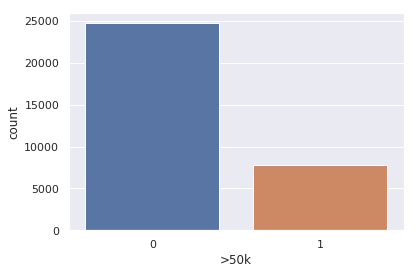

In [11]:
# >50k
sns.set()
sns.countplot(x='>50k',data=df_census);

In [12]:
#creating normalized df fromfeatures
education = df_census.groupby(['education'])['>50k'].value_counts(normalize=True).rename('Perc').reset_index()
sex = df_census.groupby(['sex'])['>50k'].value_counts(normalize=True).rename('Perc').reset_index()


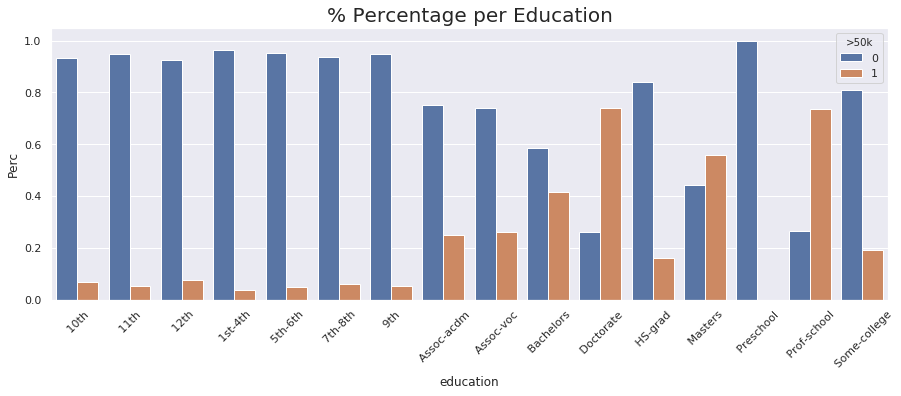

In [13]:
fig,axes=plt.subplots(figsize=(15,5))
bar=sns.barplot(x='education',y='Perc',hue='>50k',data=education,axes=axes);
bar.set_xticklabels(bar.get_xticklabels(), rotation=45);
bar.set_title('% Percentage per Education',fontsize=20);

### This feature may be a good predictor for classification. The graduate level shows a increase in income.


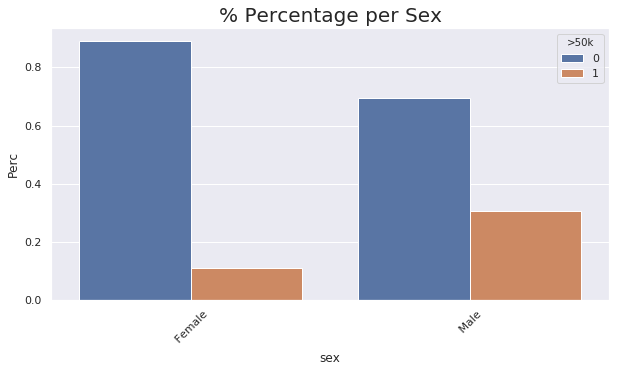

In [14]:
fig,axes=plt.subplots(figsize=(10,5))
bar=sns.barplot(x='sex',y='Perc',hue='>50k',data=sex,axes=axes);
bar.set_xticklabels(bar.get_xticklabels(), rotation=45);
bar.set_title('% Percentage per Sex',fontsize=20);

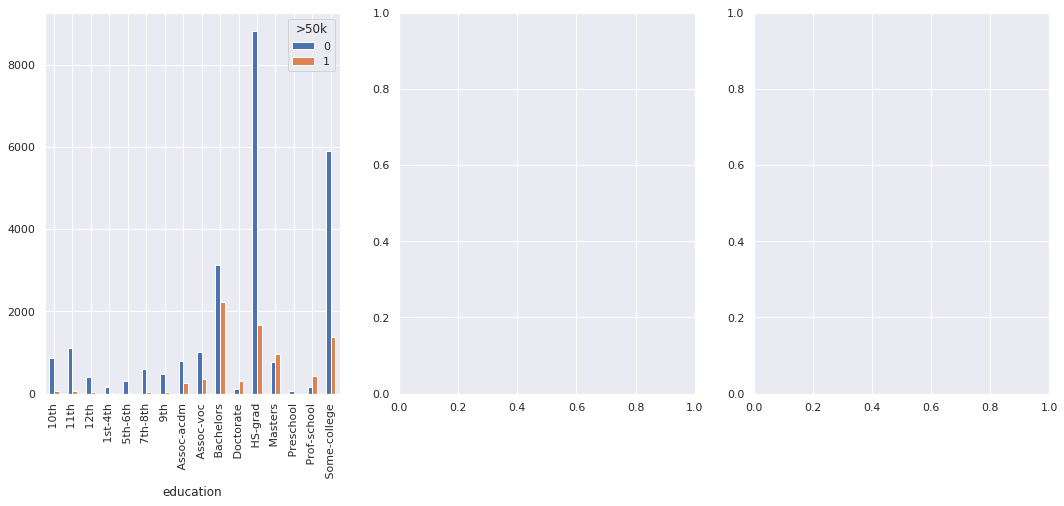

In [15]:
fig,axes=plt.subplots(1,3,figsize=(18,7))
pd.crosstab(df_census['education'],df_census['>50k']).plot(kind='bar',ax=axes[0]);


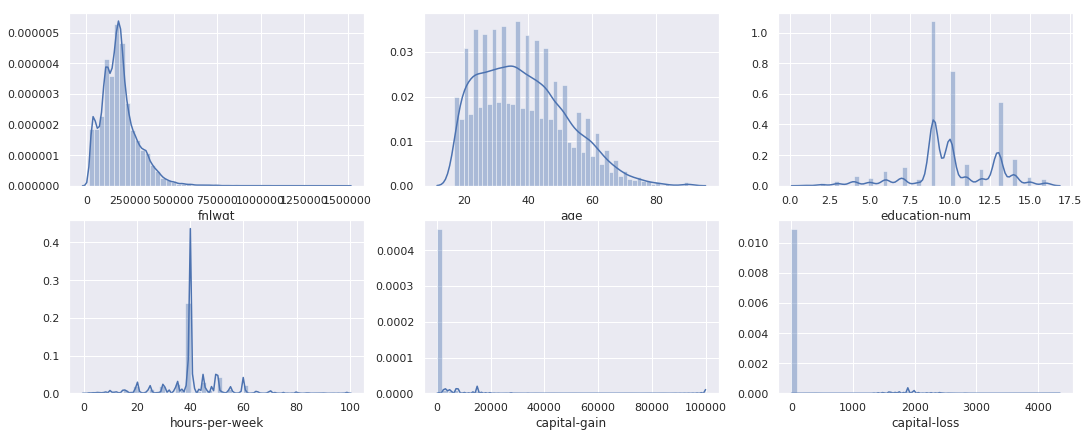

In [16]:
fig,axes=plt.subplots(2,3,figsize=(18,7))

sns.distplot(df_census['fnlwgt'],ax=axes[0,0]);
sns.distplot(df_census['age'],ax=axes[0,1]);
sns.distplot(df_census['education-num'],ax=axes[0,2]);
sns.distplot(df_census['hours-per-week'],ax=axes[1,0]);
sns.distplot(df_census['capital-gain'],ax=axes[1,1]);
sns.distplot(df_census['capital-loss'],ax=axes[1,2]);



### Binarizing Data

In [17]:
#create an new binarized column
df_census['Bin_age'] = pd.cut(df_census['age'],[17,25,35,45,60,80])

### In logistic regression, features with normal distribution works best. Let's do some transformations!

In [18]:
df_census['fnlwgt']=np.log(df_census['fnlwgt'])
df_census['age']=np.log(df_census['age'])
# add a constant
df_census['capital-gain']=df_census['capital-gain']+1
df_census['capital-loss']=df_census['capital-loss']+1

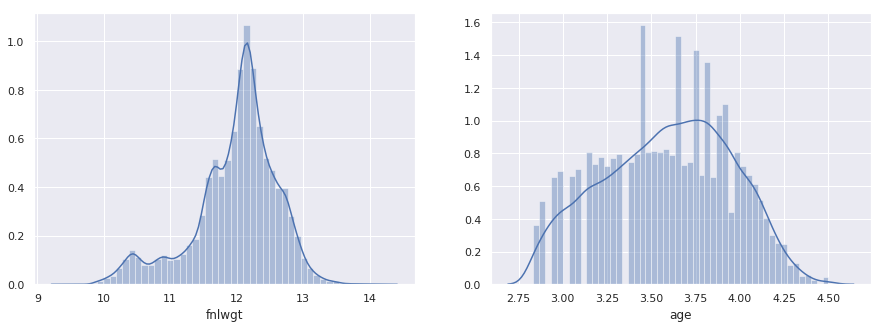

In [19]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

sns.distplot(df_census['fnlwgt'],ax=axes[0]);
sns.distplot(df_census['age'],ax=axes[1]);



In [20]:
df_census.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50k,Bin_age
32556,3.295837,Private,12.458006,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,1,1,38,United-States,0,"(25, 35]"
32557,3.688879,Private,11.947134,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1,1,40,United-States,1,"(35, 45]"
32558,4.060443,Private,11.931044,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,1,1,40,United-States,0,"(45, 60]"
32559,3.091042,Private,12.213495,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,1,1,20,United-States,0,"(17, 25]"
32560,3.951244,Self-emp-inc,12.570462,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15025,1,40,United-States,1,"(45, 60]"


## 3 - Feature selection
#### This is a technique used when there are an large number of variables in the dataset.
#### Let's use a technique known as "Information Value". it's used to select variables relevant to the fit model and generates a score for each variable 

In [21]:
 def IV_calc(data,var):
        if data[var].dtypes == "object":
            dataf = data.groupby([var])['>50k'].agg(['count','sum'])
            dataf.columns = ["Total","bad"]
            dataf["good"] = dataf["Total"] - dataf["bad"]
            dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum()
            dataf["good_per"] = dataf["good"]/dataf["good"].sum()
            dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"])
            return dataf
        else:
            data['bin_var'] = pd.qcut(data[var].rank(method='first'),10)
            dataf = data.groupby(['bin_var'])['>50k'].agg(['count','sum'])
            dataf.columns = ["Total","bad"]
            dataf["good"] = dataf["Total"] - dataf["bad"]
            dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum()
            dataf["good_per"] = dataf["good"]/dataf["good"].sum()
            dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"])
            return dataf


In [22]:
# List of IV values
total_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','Bin_age' ]
Iv_list = []
for col in total_columns:
    assigned_data = IV_calc(data = df_census,var = col)
    iv_val = round(assigned_data["I_V"].sum(),3)
    dt_type = df_census[col].dtypes
    Iv_list.append((iv_val,col,dt_type))
Iv_list = sorted(Iv_list,reverse = True)
for i in range(len(Iv_list)):
    print (Iv_list[i][0],",",Iv_list[i][1],",type =",Iv_list[i][2])

inf , workclass ,type = object
inf , native-country ,type = object
inf , education ,type = object
1.536 , relationship ,type = object
1.339 , marital-status ,type = object
1.138 , age ,type = float64
0.776 , occupation ,type = object
0.743 , Bin_age ,type = category
0.678 , education-num ,type = int64
0.444 , hours-per-week ,type = int64
0.303 , sex ,type = object
0.263 , capital-gain ,type = int64
0.069 , race ,type = object
0.048 , capital-loss ,type = int64
0.008 , fnlwgt ,type = float64


### The table below, shows an indicator for the values:
#### < 0.02 -> Useless for prediction
#### 0.02 to 0.1 -> Weak for prediction
#### 0.01 to 0.3 -> Medium for prediction
#### 0.03 to 0.5 -> Strong for prediction
#### > 0.05 -> too good for prediction


## 4- Generating the model
#### - Creating of df from Function IV
#### - Hot encoder technique 
#### - Concatenate dataframes


In [23]:
#one hot encoder
#Creating dummy variables
df_dummy = pd.get_dummies(df_census[['occupation','marital-status','relationship','sex','Bin_age']],drop_first=True)


In [24]:
#concatenate
df_model = pd.concat([df_census[['education-num','hours-per-week','>50k']],df_dummy],axis=1)

In [25]:
df_model.head()

,education-num,hours-per-week,>50k,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,"Bin_age_(25, 35]","Bin_age_(35, 45]","Bin_age_(45, 60]","Bin_age_(60, 80]"
0,13,40,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,13,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,9,40,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
3,7,40,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,13,40,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [26]:
## Split dataframe in Training and test dataset
X_train,X_test,y_train,y_test = train_test_split(df_model.loc[:,df_model.columns !='>50k'],df_model.loc[:,'>50k'])

In [27]:
# fit the model
X = sm.add_constant(X_train)
logistic = sm.Logit(y_train,X).fit()

Optimization terminated successfully.
         Current function value: 0.347488
         Iterations 9


In [28]:
# Summary of model
print (logistic.summary())

                           Logit Regression Results                           
Dep. Variable:                   >50k   No. Observations:                24420
Model:                          Logit   Df Residuals:                    24387
Method:                           MLE   Df Model:                           32
Date:                Sat, 02 Feb 2019   Pseudo R-squ.:                  0.3736
Time:                        21:47:18   Log-Likelihood:                -8485.7
converged:                       True   LL-Null:                       -13547.
                                        LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -9.7684      0.365    -26.774      0.000     -10.484      -9.053
education-num                             0.2893  

In [29]:
y_pred = logistic.predict(X)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
df_result = pd.concat([y_train,y_pred],axis=1)

In [32]:
df_result.rename(columns={'>50k':'Train',0:'Pred'},inplace=True)

In [33]:
df_result['Probs']= df_result['Pred']

In [ ]:
accuracy_score(df_result['Train'], df_result['Pred'])

In [34]:
for i in list(np.arange(0,1,0.1)):
    df_result["Pred"] = 0
    df_result.loc[df_result["Probs"] > i, 'Pred'] = 1
    print ("Threshold",i,"Train Accuracy:",round(accuracy_score(df_result['Train'], df_result['Pred']),4))

Threshold 0.0 Train Accuracy: 0.2432
Threshold 0.1 Train Accuracy: 0.6903
Threshold 0.2 Train Accuracy: 0.7675
Threshold 0.3 Train Accuracy: 0.8105
Threshold 0.4 Train Accuracy: 0.8314
Threshold 0.5 Train Accuracy: 0.8346
Threshold 0.6 Train Accuracy: 0.8291
Threshold 0.7 Train Accuracy: 0.8183
Threshold 0.8 Train Accuracy: 0.7942
Threshold 0.9 Train Accuracy: 0.7621


In [35]:
df_result["Pred"] = 0
df_result.loc[df_result["Probs"] > 0.5, 'Pred'] = 1
print(confusion_matrix(df_result['Train'],df_result['Pred']))
print('Score ',accuracy_score(df_result['Train'], df_result['Pred']))

[[17017  1464]
 [ 2575  3364]]
Score  0.834602784603


### The score was high, but viewing the confusion matrix , note the class was imbalanced. Hence an important metric is  

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
#one hot encoder
#Creating dummy variables without 'drop_first'argument
df_dummy = pd.get_dummies(df_census[['occupation','marital-status','relationship','sex','Bin_age']])
#concatenate
df_model_rf = pd.concat([df_census[['education-num','hours-per-week','>50k']],df_dummy],axis=1)

In [38]:
## Split dataframe in Training and test dataset
X_train,X_test,y_train,y_test = train_test_split(df_model_rf.loc[:,df_model_rf.columns !='>50k'],df_model_rf.loc[:,'>50k'])

In [39]:
model_rf = RandomForestClassifier( n_estimators=1000, criterion="gini",max_depth=100, min_samples_split=3,min_samples_leaf=2)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
print('Training score ',accuracy_score(y_train, model_rf.predict(X_train)))
print('Test score ',accuracy_score(y_test, model_rf.predict(X_test)))


Training score  0.871253071253
Test score  0.823731728289


In [41]:
y_pred = model_rf.predict(X_test)

In [42]:
# Confusion matrix
pd.crosstab(y_test.values, y_pred,rownames =["Actuall"],colnames = ["Predicted"])

Predicted,0,1
Actuall,,
0,5581,554
1,881,1125


In [43]:
from sklearn.metrics import accuracy_score, classification_report

In [44]:
dummyarray = np.empty((6,10))
dt_weight = pd.DataFrame(dummyarray)

dt_weight.columns = ["zero_wght","one_wght","tr_accuracy",
"tst_accuracy", "prec_zero","prec_one", "prec_ovll",
"recl_zero","recl_one","recl_ovll"]

In [45]:
weights = [0.01,0.1,0.2,0.3,0.4,0.5]

In [62]:
for i in range(len(weights)):
    clwght = {0:weights[i],1:1.0-weights[i]}
    dt_fit =  RandomForestClassifier( n_estimators=1000, criterion="gini",max_depth=100, min_samples_split=3,min_samples_leaf=2,class_weight =
clwght)
    #DecisionTreeClassifier(criterion="gini", max_depth=5,
    #min_samples_split=2, min_samples_leaf=1,random_state=42,class_weight =
#clwght)
    dt_fit.fit(X_train,y_train)
    dt_weight.loc[i, 'zero_wght'] = clwght[0]
    dt_weight.loc[i, 'one_wght'] = clwght[1]
    dt_weight.loc[i, 'tr_accuracy'] = round(accuracy_score(y_train,dt_fit.predict(X_train)),3)
    dt_weight.loc[i, 'tst_accuracy'] =round(accuracy_score(y_test,dt_fit.predict(X_test)),3)
    clf_sp =classification_report(y_test,dt_fit.predict(X_test)).split()
    dt_weight.loc[i, 'prec_zero'] = float(clf_sp[5])
    dt_weight.loc[i, 'prec_one'] = float(clf_sp[10])
    dt_weight.loc[i, 'prec_ovll'] = float(clf_sp[17])
    dt_weight.loc[i, 'recl_zero'] = float(clf_sp[6])
    dt_weight.loc[i, 'recl_one'] = float(clf_sp[11])
    dt_weight.loc[i, 'recl_ovll'] = float(clf_sp[18])
    print ("\nClass Weights",clwght,"Train accuracy:",round(accuracy_score( y_train,dt_fit.predict(X_train)),3),"Test accuracy:",
    round(accuracy_score(y_test, dt_fit.predict(X_test)),3))
    print ("Test ConfusionMatrix\n\n",pd.crosstab(y_test,dt_fit.predict( X_test),rownames =["Actuall"],colnames = ["Predicted"]))


Class Weights {0: 0.01, 1: 0.99} Train accuracy: 0.753 Test accuracy: 0.728
Test ConfusionMatrix

 Predicted     0     1
Actuall              
0          4078  2023
1           190  1850

Class Weights {0: 0.1, 1: 0.9} Train accuracy: 0.805 Test accuracy: 0.776
Test ConfusionMatrix

 Predicted     0     1
Actuall              
0          4539  1562
1           262  1778

Class Weights {0: 0.2, 1: 0.8} Train accuracy: 0.83 Test accuracy: 0.804
Test ConfusionMatrix

 Predicted     0     1
Actuall              
0          4853  1248
1           350  1690

Class Weights {0: 0.3, 1: 0.7} Train accuracy: 0.858 Test accuracy: 0.83
Test ConfusionMatrix

 Predicted     0     1
Actuall              
0          5253   848
1           532  1508

Class Weights {0: 0.4, 1: 0.6} Train accuracy: 0.868 Test accuracy: 0.836
Test ConfusionMatrix

 Predicted     0     1
Actuall              
0          5487   614
1           722  1318

Class Weights {0: 0.5, 1: 0.5} Train accuracy: 0.868 Test accuracy: 0

### Executing the model with chosen weight

In [48]:
rf_model = RandomForestClassifier( n_estimators=1000, criterion="gini",max_depth=100, min_samples_split=3,min_samples_leaf=2,class_weight =
{0:0.3,1:0.7})
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.3, 1: 0.7},
            criterion='gini', max_depth=100, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [49]:
print ("Test ConfusionMatrix\n\n",pd.crosstab(y_test,rf_model.predict( X_test),rownames =["Actuall"],colnames = ["Predicted"]))

Test ConfusionMatrix

 Predicted     0     1
Actuall              
0          5082  1053
1           511  1495


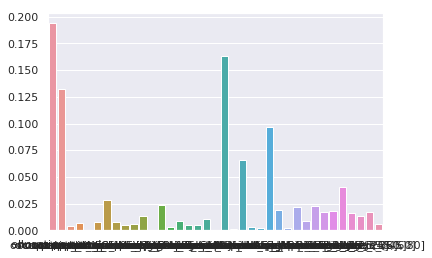

In [50]:
sns.barplot(x=X_train.columns,y=rf_model.feature_importances_);

## Pipeline and Grid search

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [116]:
 pipeline = Pipeline([
('clf',RandomForestClassifier(criterion='gini'))])
parameters = {
    'clf__n_estimators':(1000,2000,3000), #number of the tress
    'clf__max_depth':(100,200,300),# max depth in tree
    'clf__min_samples_split':(2,3), # min of the samples for the split
    'clf__min_samples_leaf':(1,2) } # min of the samples in leaf node

In [ ]:
grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1, cv=5,verbose=1,scoring='accuracy')
grid_search.fit(X_train,y_train)    

In [ ]:
print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

In [ ]:
preds = grid_search.predict(x_test)
print ("Testing accuracy:",accuracy_score(y_test,preds))

In [ ]:
#confusion matrix
pd.crosstab(y_test, preds,rownames = ["Actuall"],colnames =["Predicted"])

In [65]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 3.9MB/s 
  Found existing installation: seaborn 0.8
    Uninstalling seaborn-0.8:
      Successfully uninstalled seaborn-0.8
You are using pip version 18.0, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [68]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 2.1MB/s 
  Found existing installation: pip 18.0
    Uninstalling pip-18.0:
      Successfully uninstalled pip-18.0
